## Chapter 28: Complex number and applications

### Complex Lineary Algebra

In [14]:
C = [1 -im;2+im 3]

2×2 Array{Complex{Int64},2}:
 1+0im  0-1im
 2+1im  3+0im

In [15]:
C'

2×2 LinearAlgebra.Adjoint{Complex{Int64},Array{Complex{Int64},2}}:
 1+0im  2-1im
 0+1im  3+0im

### Discrete Fourier Transform

In [16]:
x=[1,0,2,0]

4-element Array{Int64,1}:
 1
 0
 2
 0

In [17]:
F=[exp(2*pi*im*i*j/4) for i=0:3,j=0:3]

4×4 Array{Complex{Float64},2}:
 1.0+0.0im           1.0+0.0im          …           1.0+0.0im
 1.0+0.0im   6.12323e-17+1.0im             -1.83697e-16-1.0im
 1.0+0.0im          -1.0+1.22465e-16im             -1.0+3.67394e-16im
 1.0+0.0im  -1.83697e-16-1.0im              5.51091e-16+1.0im

In [18]:
F*x

4-element Array{Complex{Float64},1}:
  3.0 + 0.0im
 -1.0 + 2.4492935982947064e-16im
  3.0 - 4.898587196589413e-16im
 -1.0 + 7.347880794884119e-16im

### FFTW

In [19]:
using FFTW

In [20]:
fft(x)

4-element Array{Complex{Float64},1}:
  3.0 + 0.0im
 -1.0 + 0.0im
  3.0 + 0.0im
 -1.0 + 0.0im

In [21]:
ifft(fft(x))

4-element Array{Complex{Float64},1}:
 1.0 + 0.0im
 0.0 + 0.0im
 2.0 + 0.0im
 0.0 + 0.0im

### Filtering an image with an FFT

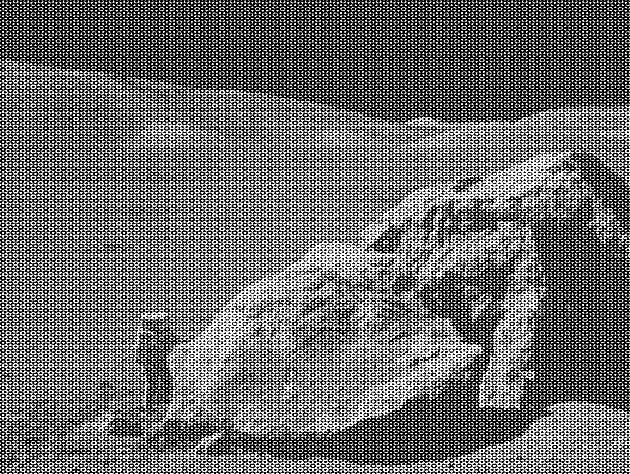

In [29]:
using FileIO, ImageShow, Images
img = load("../data/moonlanding.png")

In [30]:
typeof(img)

Array{Gray{Normed{UInt8,8}},2}

In [31]:
channelview(img)

474×630 reinterpret(N0f8, ::Array{Gray{N0f8},2}):
 0.047  0.0    0.239  0.467  0.0    …  0.333  0.404  0.0    0.004  0.533
 0.0    0.0    0.678  0.933  0.0       0.0    0.0    0.102  0.29   0.0
 0.722  0.11   0.604  0.827  0.243     1.0    0.949  0.0    0.216  1.0
 0.675  0.004  0.0    0.0    0.0       0.957  0.322  0.0    0.0    0.486
 0.0    0.0    0.486  0.725  0.0       0.0    0.282  0.0    0.094  0.396
 0.0    0.0    1.0    1.0    0.0    …  0.004  0.522  0.745  0.945  0.6
 0.043  0.0    0.0    0.0    0.0       0.322  0.024  0.0    0.0    0.173
 1.0    0.149  0.0    0.114  0.247     1.0    0.945  0.0    0.0    1.0
 0.004  0.0    0.788  1.0    0.0       0.0    0.267  0.2    0.396  0.361
 0.0    0.0    0.424  0.675  0.0       0.0    0.0    0.0    0.035  0.0
 1.0    0.298  0.129  0.333  0.4    …  1.0    1.0    0.0    0.0    1.0
 0.318  0.0    0.0    0.0    0.0       0.6    0.243  0.0    0.0    0.396
 0.0    0.0    0.867  1.0    0.0       0.0    0.106  0.278  0.475  0.188
 ⋮           

In [34]:
freqs = fft(channelview(img),1:2)

474×630 Array{Complex{Float32},2}:
 126598.0+0.000320937im  -4608.58-1892.47im  …  -4608.58+1892.47im
  -9421.1+5242.11im       5224.02-3171.74im      1965.37-2188.06im
 -2928.35+7280.92im      -1116.41+1338.32im      2641.93-292.094im
  1850.57+2451.18im        1897.4+2281.91im     -781.081-13.7446im
  2194.01-96.5351im       529.517+2442.5im      -1797.76+1692.55im
  285.781+1424.69im      -1300.59+271.547im  …    597.34+1362.24im
  139.473+1022.81im      -766.318+260.644im      62.9801+844.028im
  1871.04+1946.71im      -2092.53+258.471im     -52.7517-683.973im
  1141.77+296.663im       587.881+10.5945im     -1228.52-492.129im
 -43.3111+2411.21im      -885.461-1058.96im     -647.138+7.54077im
  -67.564+1699.18im      -112.066-409.258im  …  -662.624+304.679im
  527.798+1427.87im      -494.677+554.326im     -365.471-575.604im
 -149.717+1122.1im        266.354-94.1281im      258.764-570.529im
         ⋮                                   ⋱  
 -149.717-1122.11im       258.764+570.529im  

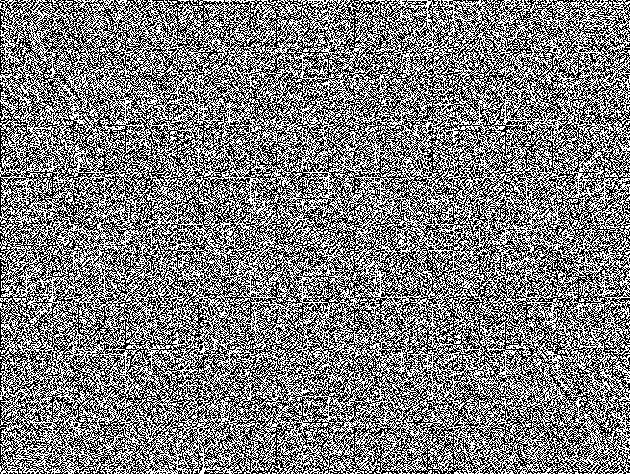

In [38]:
colorview(Gray, real(freqs))

In [39]:
size(freqs)

(474, 630)

In [44]:
freqs[25:425,:] .= 0; freqs[:,50:600] .= 0; 

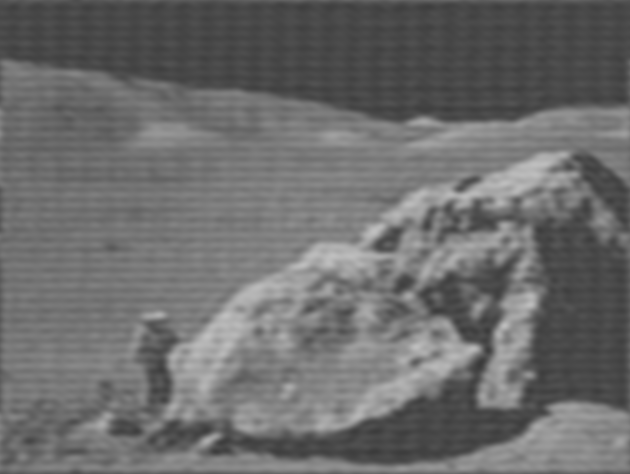

In [45]:
colorview(Gray,real(ifft(freqs)))